# Natural Language Processing -&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Idan Ron

NOTE: The questions were taken from the "Python for Data-Science" Course by Jose Portilla. all of the code was written by me.

In this NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the Data

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Lets create a new "text length" column for the # of chars in the text column**

In [5]:
yelp['text length'] = yelp['text'].apply(len)

In [6]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


##  EDA

Lets check the relationships in the data

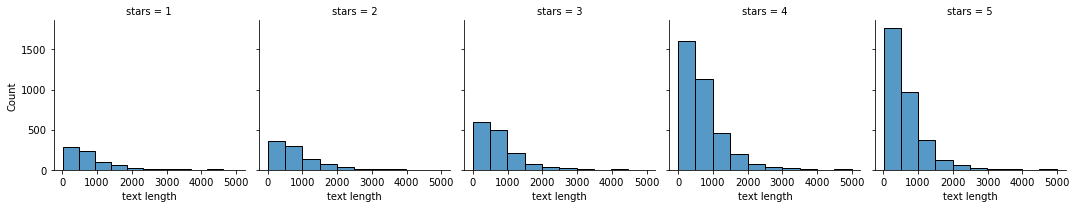

In [10]:
g = sns.FacetGrid(data = yelp , col = 'stars')
g.map(sns.histplot , 'text length' , bins = 10)

<AxesSubplot:xlabel='stars', ylabel='text length'>

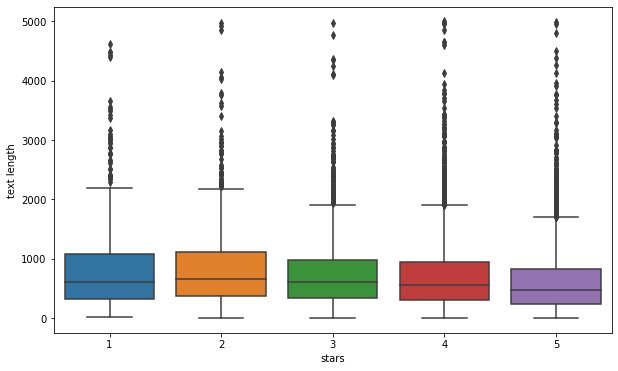

In [14]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'stars' , y = 'text length' , data = yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

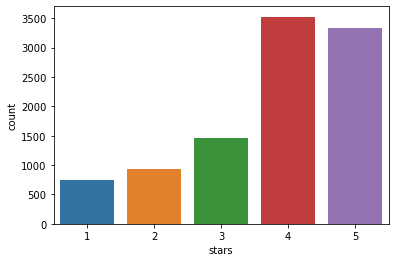

In [16]:
sns.countplot(x = 'stars' ,data = yelp)

In [20]:
yelp_means = yelp.groupby('stars').mean()
yelp_means

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


                 cool    useful     funny  text length
cool         1.000000 -0.743329 -0.944939    -0.857664
useful      -0.743329  1.000000  0.894506     0.699881
funny       -0.944939  0.894506  1.000000     0.843461
text length -0.857664  0.699881  0.843461     1.000000


<AxesSubplot:>

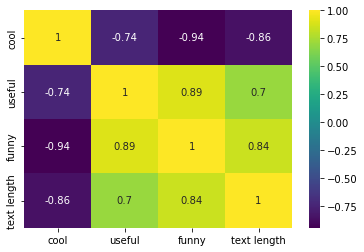

In [25]:
yelp_means_corr = yelp_means.corr()
print(yelp_means_corr)
sns.heatmap(yelp_means_corr , cmap='viridis' , annot = True)

## NLP Classification Task
I will grab only 1 or 5 stars for the sake of this assignment

In [29]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [32]:
X = yelp_class['text'] # Features
y = yelp_class['stars'] # Labels

**Now lets vectorize**

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [37]:
X = cv.fit_transform(X)

## Train-Test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state = 101)

## Training the Model

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(X_train , y_train)

MultinomialNB()

## Predictions & Evaluations

In [43]:
predictions = nb.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test , predictions))
print('\n')
print(classification_report(y_test , predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Now lets try using TF-IDF using a pipeline**

In [49]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [52]:
pipeline = Pipeline([
    ('bow',CountVectorizer()), # strings to token integer counts (bag of words)
    ('tfidf',TfidfTransformer()), # integer counts to weighted scores
    ('classifier',MultinomialNB()) # training
])

In [53]:
# Train-Test again
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train , y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Predictions & Evaluations

In [56]:
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test , predictions))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       233
           5       0.81      1.00      0.90       993

    accuracy                           0.81      1226
   macro avg       0.91      0.50      0.45      1226
weighted avg       0.85      0.81      0.73      1226



[[  1 232]
 [  0 993]]


**Seems like it made things worse this time..**

## The End